## Visualize evaluated tracer percentile

In [1]:
import xarray as xr
from static import *
import cftime
import matplotlib.pyplot as plt

In [2]:
datasets = ['gobai','esm4']
tracernames = ['o2']
ascending = False

In [3]:
dd = {}
for dataset in datasets:
    dd[dataset]=xr.Dataset()
    for tracername in tracernames:
        tmp = xr.open_dataset(path_tp(tracername,dataset,ascending))
        tmp = tmp.rename({'tp':'tp_'+tracername,'Tp':'Tp_'+tracername})
        dd[dataset]=xr.merge([dd[dataset],tmp])

### Continuous time

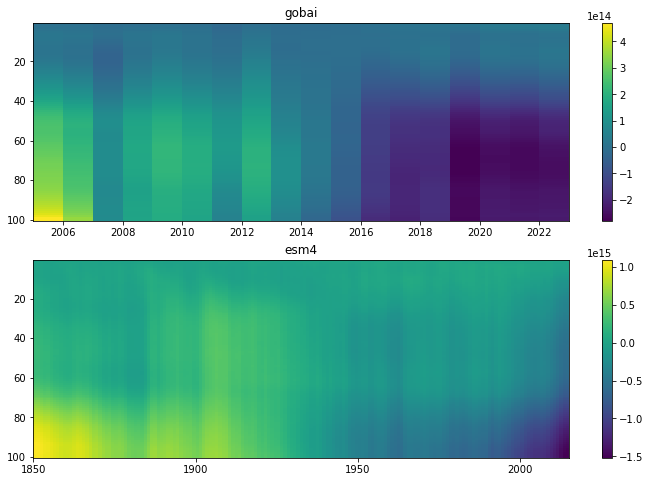

In [4]:
tracername = 'o2'
fig,axarr = plt.subplots(figsize=(12,8),nrows=2)
for i,dataset in enumerate(datasets):
    ax = axarr.flat[i]
    ds = dd[dataset]
    Z = ds['Tp_'+tracername]-ds['Tp_'+tracername].mean('time')
    im = ax.pcolormesh(Z['time'].values,Z['percentile'],Z.transpose(),shading='auto')
    ax.invert_yaxis()
    ax.set_title(dataset)
    plt.colorbar(im,ax=ax)

### Difference two time periods

In [5]:
t1 = ['2005','2009']
t2 = ['2010','2014']
t1slice = slice(t1[0]+'-01-01',t1[1]+'-12-31')
t2slice = slice(t2[0]+'-01-01',t2[1]+'-12-31')
t1label = t1[0]+' to '+t1[1]
t2label = t2[0]+' to '+t2[1]
t1color='tab:blue'
t2color='tab:orange'
dt = cftime.datetime(int(t2[1]),12,31)-cftime.datetime(int(t1[1]),12,31)
dt = dt.days*24*60*60

In [6]:
dTp = xr.Dataset()
for dataset in datasets:
    ds = dd[dataset]
    ds_t1 = ds.sel(time=t1slice).mean('time')
    ds_t2 = ds.sel(time=t2slice).mean('time')
    dds = (ds_t2-ds_t1)/dt
    for tracername in tracernames:
        dTp[dataset+'_'+tracername] = dds['Tp_'+tracername]

In [7]:
dTp

<xarray.Dataset>
Dimensions:     (percentile: 100)
Coordinates:
  * percentile  (percentile) float64 1.0 2.0 3.0 4.0 ... 97.0 98.0 99.0 100.0
Data variables:
    gobai_o2    (percentile) float64 -1.832e+04 -4.852e+04 ... -1.088e+06
    esm4_o2     (percentile) float64 -5.916e+04 -9.03e+04 ... -1.582e+06

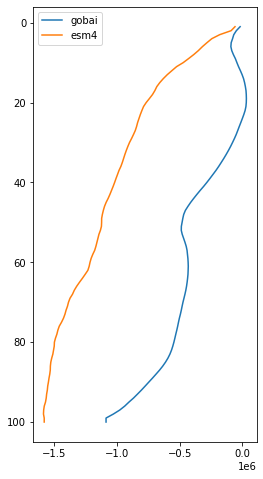

In [8]:
fig,ax = plt.subplots(figsize=(4,8))
for dataset in datasets:
    for tracername in tracernames:
        variable = '_'.join([dataset,tracername])
        ax.plot(dTp[variable],dTp[variable]['percentile'],
                color=dataset_args()[dataset]['color'],
                linestyle=tracer_args()[tracername]['linestyle'],
                label=dataset)
ax.invert_yaxis()
ax.legend()

In [10]:
variable

'gobai_o2sat'